# Abstract:


The input parameters of the model used are the sensor parameters . The output of the model is a single parameter: 

This Notebook will analyze the correlation between the input parameters (sensors) and determine which parameters are the most important, deciding on the output of the model, thereby building the simplest model, which requires less input parameters but the most accurate prediction results.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pump-sensor-data/sensor.csv


In [ ]:
import pandas as pd
data =  pd.read_csv("../input/sensor.csv")

# Step 1. Data cleaning

In [ ]:
data.shape

(220320, 55)

<h4> The data frame shows that, there are 55 columns with 220320 recordings. Moreover, the measurements have different scales, as following.<h4>

In [ ]:
data.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,220320.0,110159.500000,63601.049991,0.000000,55079.750000,110159.500000,165239.250000,220319.000000
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960


In [ ]:
data.isnull().sum()

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


<h4> Let remove first all NaN columns and all columns have zero standard values.<h4>

In [ ]:
data.drop(['Unnamed: 0', 'timestamp','sensor_00','sensor_15','sensor_50','sensor_51'],axis=1, inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4391db390>,
      dtype=object)

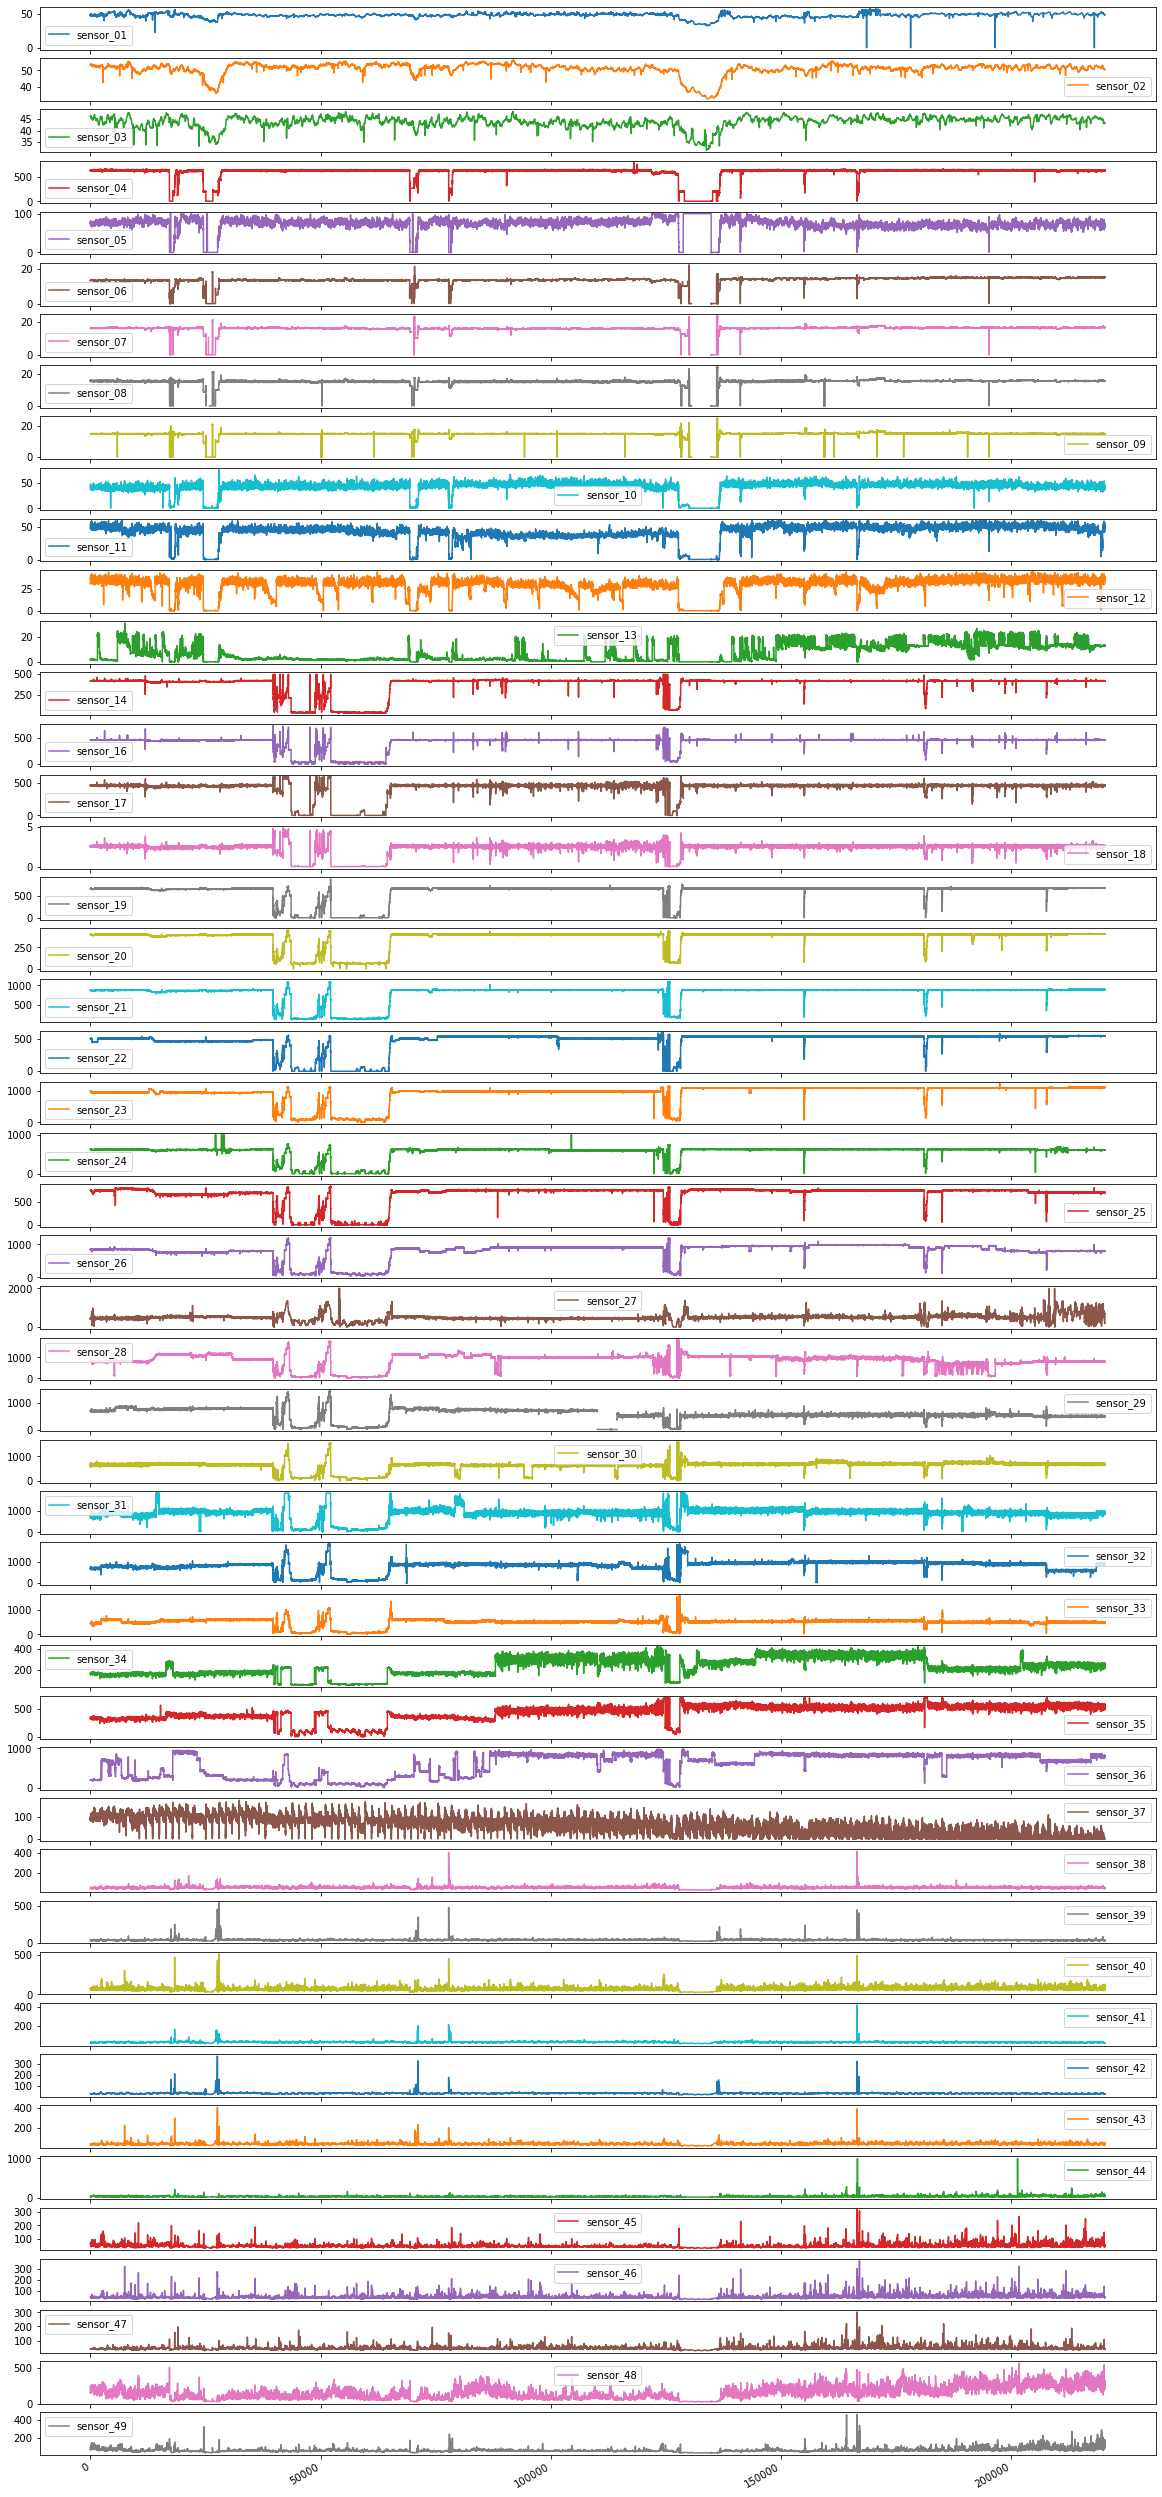

In [ ]:
import matplotlib.pyplot as plt
data.plot(subplots =True, sharex = True, figsize = (20,50))

In [ ]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [ ]:
import numpy as np
conditions = [(data['machine_status'] =='NORMAL'), (data['machine_status'] =='BROKEN'), (data['machine_status'] =='RECOVERING')]
choices = [1, 0, 0.5]
data['Operation'] = np.select(conditions, choices, default=0)

In order to check if there is some obvious patterns that could be landmarked in a certain period, we have added the "Operation" code in the illustrations. That could helps us to define a good dataset to fitthe model.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe43bf29d50>,
      dtype=object)

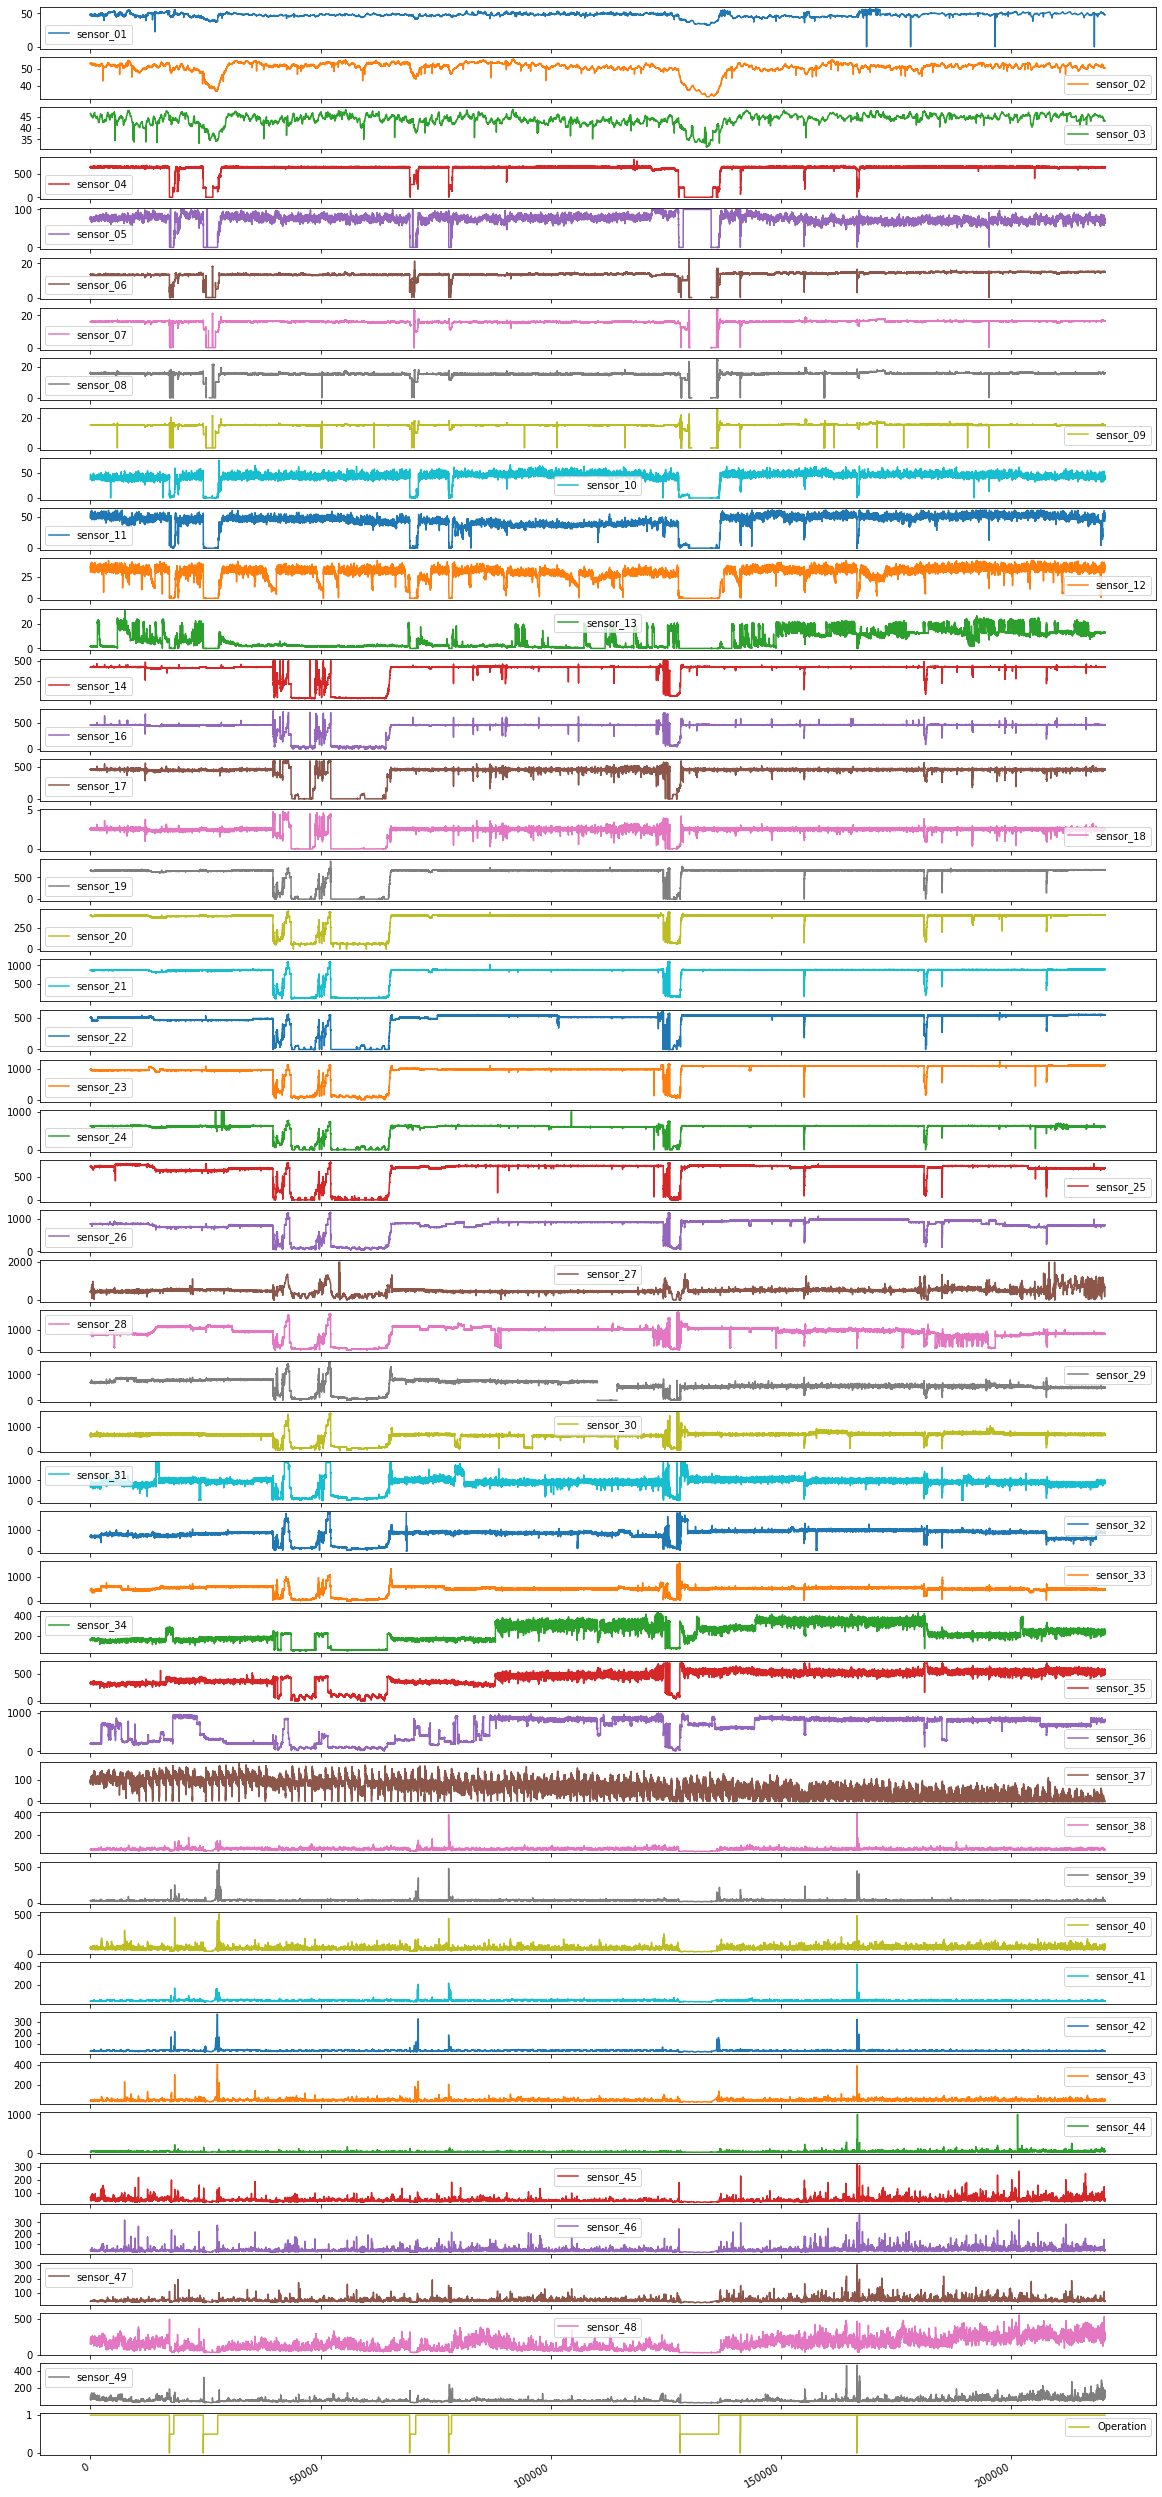

In [ ]:
import matplotlib.pyplot as plt
data.plot(subplots =True, sharex = True, figsize = (20,50))

In [ ]:
data.columns

Index(['sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05',
       'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21',
       'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26',
       'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31',
       'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36',
       'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41',
       'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46',
       'sensor_47', 'sensor_48', 'sensor_49', 'machine_status', 'Operation'],
      dtype='object')

# Step 2. Assumptions and LSTM model

**bold text**# Set 0: 


In [ ]:
df0 = pd.DataFrame(data, columns=['Operation','sensor_04', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09'])

In [ ]:
df1 = pd.DataFrame(data, columns=['Operation','sensor_01', 'sensor_04', 'sensor_10', 'sensor_14', 'sensor_19', 'sensor_25'])

In [ ]:
df2 = pd.DataFrame(data, columns = ['Operation','sensor_02', 'sensor_05', 'sensor_11', 'sensor_16', 'sensor_20', 'sensor_26'])

In [ ]:
df3 = pd.DataFrame(data, columns = ['Operation','sensor_03', 'sensor_06', 'sensor_12', 'sensor_17', 'sensor_21', 'sensor_28'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe43958ba50>,
      dtype=object)

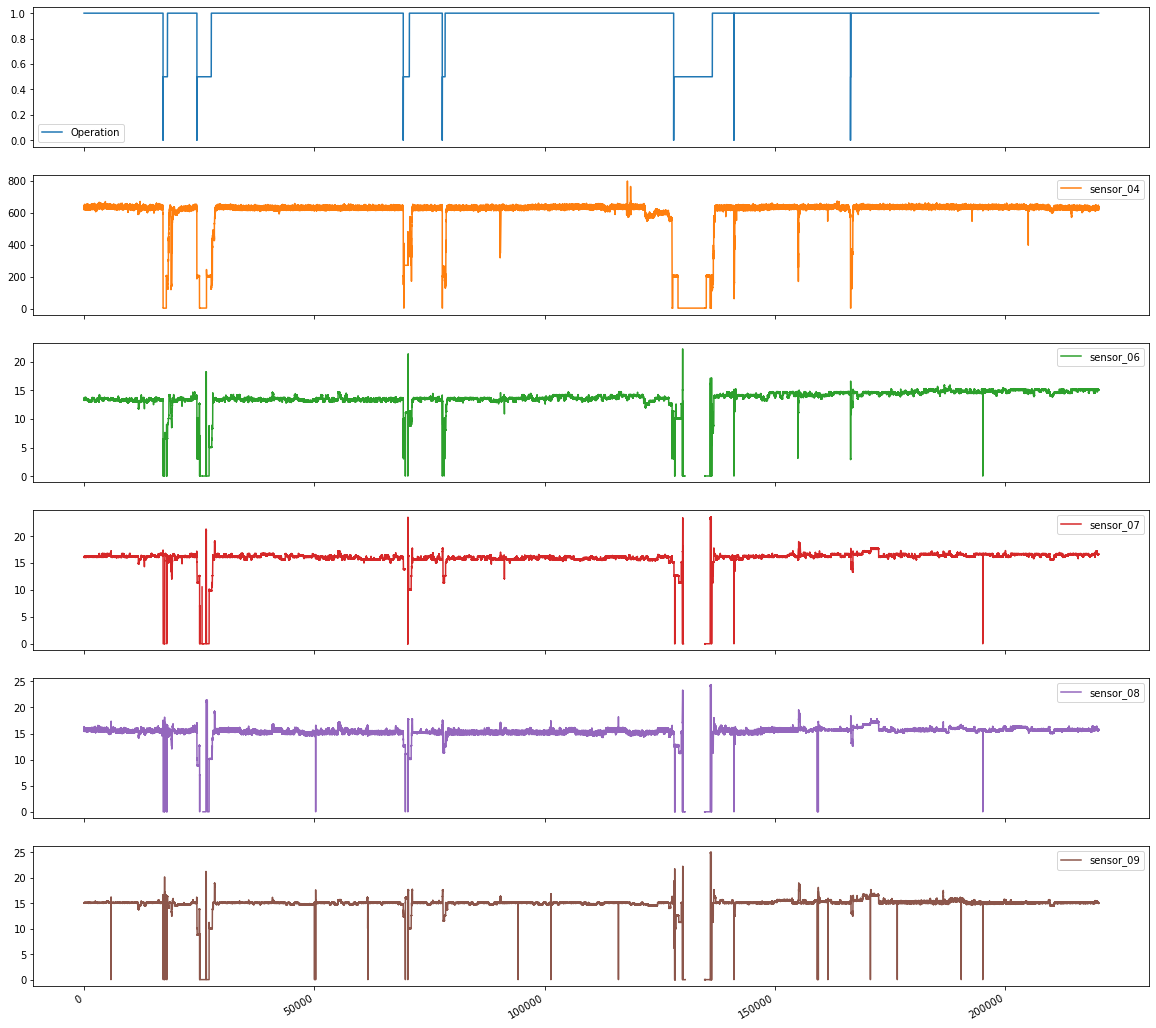

In [ ]:
df0.plot(subplots =True, sharex = True, figsize = (20,20))

It seems that this time data series correlate a lot with the failure of the machine and can be a good indicator of the failure of the system, we will check it for another dataset. For now, the only concern is manipulation and prediction to test the robustness of classical methods.

In [ ]:
df = df0
df.shape

(220320, 6)

# Step 3. Traing the model and implement the prediction

# Training set:

We choose 50,000 data points with 2 broken points to train the model, 

# Testing set:

the remaining 170,000 points with 5 broken states will be used to test the predictivity of the model.

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series.
values = reframed.values
n_train_time = 50000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

Epoch 1/50
715/715 - 5s - loss: 0.0280 - val_loss: 0.0014
Epoch 2/50
715/715 - 5s - loss: 0.0050 - val_loss: 0.0012
Epoch 3/50
715/715 - 5s - loss: 0.0044 - val_loss: 0.0011
Epoch 4/50
715/715 - 5s - loss: 0.0041 - val_loss: 0.0011
Epoch 5/50
715/715 - 4s - loss: 0.0041 - val_loss: 0.0012
Epoch 6/50
715/715 - 4s - loss: 0.0040 - val_loss: 0.0012
Epoch 7/50
715/715 - 4s - loss: 0.0038 - val_loss: 0.0011
Epoch 8/50
715/715 - 4s - loss: 0.0036 - val_loss: 0.0011
Epoch 9/50
715/715 - 4s - loss: 0.0033 - val_loss: 0.0010
Epoch 10/50
715/715 - 4s - loss: 0.0031 - val_loss: 9.5859e-04
Epoch 11/50
715/715 - 4s - loss: 0.0029 - val_loss: 9.1950e-04
Epoch 12/50
715/715 - 4s - loss: 0.0026 - val_loss: 8.5737e-04
Epoch 13/50
715/715 - 4s - loss: 0.0024 - val_loss: 8.4543e-04
Epoch 14/50
715/715 - 4s - loss: 0.0022 - val_loss: 7.5162e-04
Epoch 15/50
715/715 - 4s - loss: 0.0019 - val_loss: 6.9481e-04
Epoch 16/50
715/715 - 4s - loss: 0.0017 - val_loss: 6.3642e-04
Epoch 17/50
715/715 - 4s - loss: 0.00

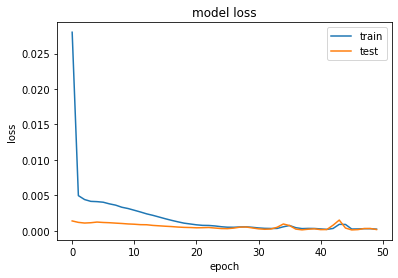

Test RMSE: 0.013


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

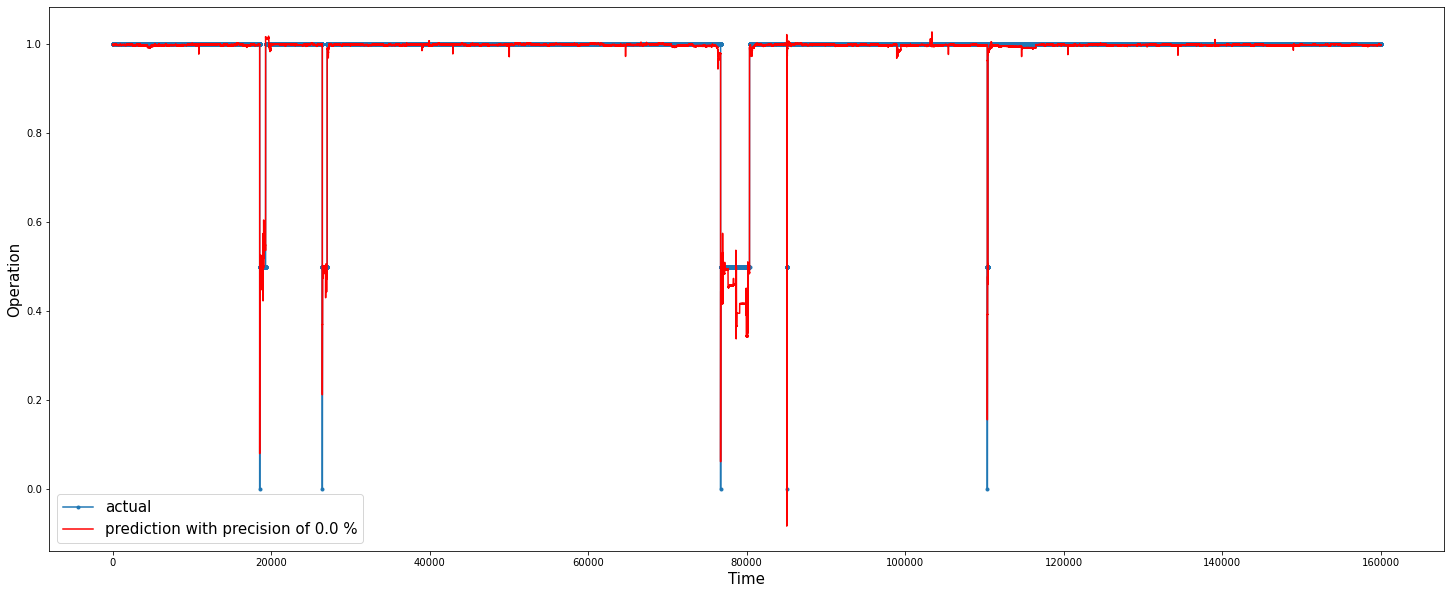

In [ ]:
import numpy as np
e = np.round(sum(np.abs(inv_y[:]-inv_yhat[:]))/(sum(inv_y[:])*len(inv_y[:]))*100,2)
aa=[x for x in range(160000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:160000], marker='.', label="actual")
plt.plot(aa, inv_yhat[:160000], 'r', label="prediction with precision of {} %".format(e))
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
df = df2
df.shape

(220320, 7)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe409b66c10>,
      dtype=object)

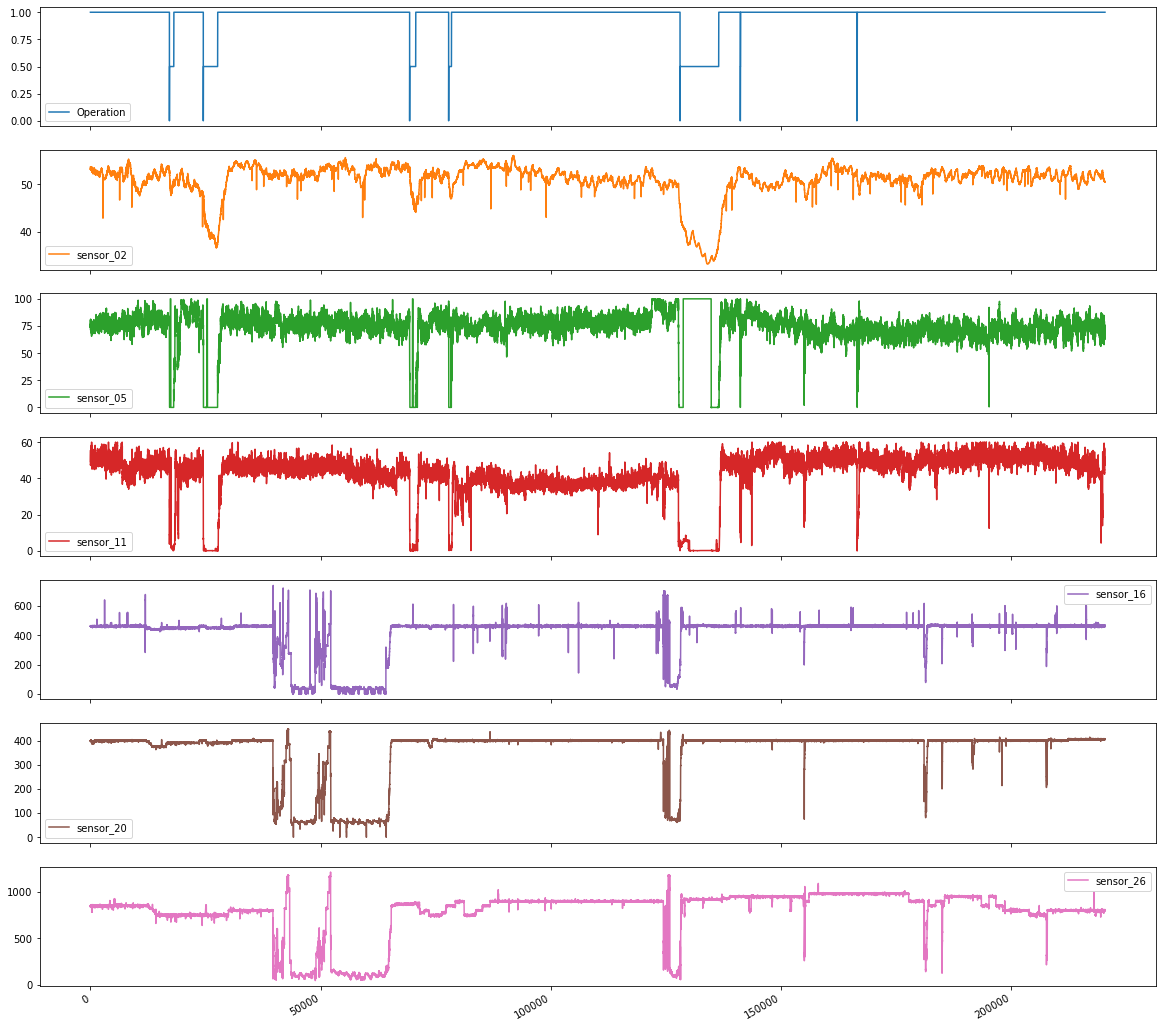

In [ ]:
df2.plot(subplots =True, sharex = True, figsize = (20,20))

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series.
values = reframed.values
n_train_time = 50000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

Epoch 1/150
715/715 - 5s - loss: 0.0298 - val_loss: 0.0140
Epoch 2/150
715/715 - 4s - loss: 0.0076 - val_loss: 0.0084
Epoch 3/150
715/715 - 4s - loss: 0.0066 - val_loss: 0.0063
Epoch 4/150
715/715 - 4s - loss: 0.0062 - val_loss: 0.0061
Epoch 5/150
715/715 - 5s - loss: 0.0058 - val_loss: 0.0059
Epoch 6/150
715/715 - 4s - loss: 0.0055 - val_loss: 0.0062
Epoch 7/150
715/715 - 4s - loss: 0.0051 - val_loss: 0.0067
Epoch 8/150
715/715 - 4s - loss: 0.0046 - val_loss: 0.0072
Epoch 9/150
715/715 - 4s - loss: 0.0042 - val_loss: 0.0077
Epoch 10/150
715/715 - 4s - loss: 0.0038 - val_loss: 0.0082
Epoch 11/150
715/715 - 5s - loss: 0.0034 - val_loss: 0.0085
Epoch 12/150
715/715 - 5s - loss: 0.0031 - val_loss: 0.0087
Epoch 13/150
715/715 - 5s - loss: 0.0027 - val_loss: 0.0088
Epoch 14/150
715/715 - 4s - loss: 0.0025 - val_loss: 0.0085
Epoch 15/150
715/715 - 4s - loss: 0.0022 - val_loss: 0.0084
Epoch 16/150
715/715 - 4s - loss: 0.0021 - val_loss: 0.0082
Epoch 17/150
715/715 - 5s - loss: 0.0018 - val_lo

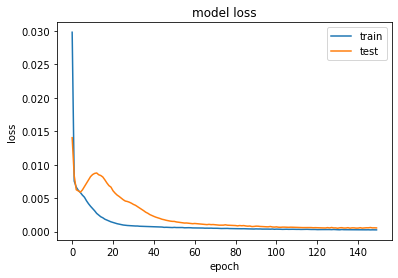

Test RMSE: 0.023


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=150, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

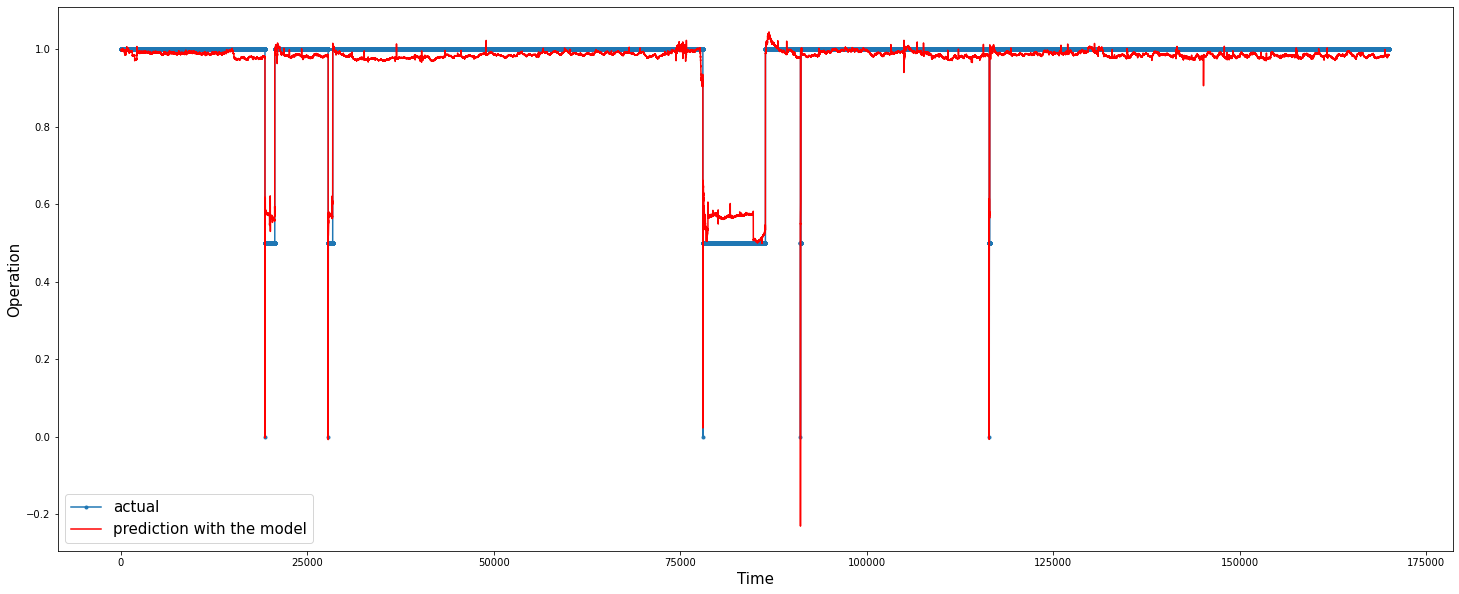

In [ ]:
import numpy as np
aa=[x for x in range(170000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:170000], marker='.', label="actual")
plt.plot(aa, inv_yhat[:170000], 'r', label="prediction with the model")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()